In [1]:
include("../src/models.jl")
include("../src/solvers.jl")
include("../src/special.jl")

using Plots
using LinearAlgebra
using ProgressBars
using Distributed

In [8]:
p = 1000
N = 1000
ω = 1.0
ρ = 0.05
τ = 0.5
β = 0.27
T = 10
σ = 0.0
n_exp = 20
ts = Array{Float64}(0:T*p) / p

normdims(X, dims) = sqrt.(sum(X .^ 2, dims=dims))
cossim(X, y) = (X * y) ./ (norm(y) * normdims(X, 2))

function genandsolve(p, σ, n_exp)
    ξ, spiked = spikedmodel(ρ, p, ω, σ)
    Y = spiked(N)
    X = offline(Y, τ, β, T)
    cossim(X, ξ')     
end;

In [9]:
Q_sigm = zeros((5, n_exp, T*p+1))
sigmas = [0.0, 0.33, 0.5, 0.66, 1]

for (k, σ) in enumerate(sigmas)
    println(σ)
    for i=1:n_exp
        Q_sigm[k, i,:] = genandsolve(p, σ, n_exp)
    end
end

0.0
0.33
0.5
0.66
1.0


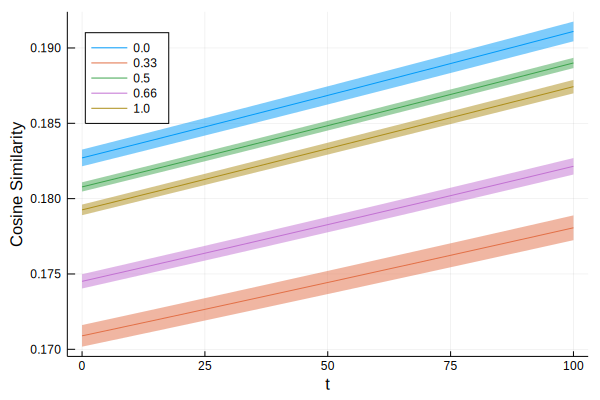

In [10]:
μ_q_sigm = mean(Q_sigm, dims=2)[:, 1, :]
σ_q_sigm = var(Q_sigm, dims=2)[:, 1, :]

plot(ts, μ_q_sigm', ribbon=σ_q_sigm', label=permutedims(map(string, sigmas)), legend=:topleft,
     xlabel="t", ylabel="Cosine Similarity")